In [2]:
!pip install numpy tensorflow

In [15]:
import numpy
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.constraints import MaxNorm
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [4]:
# Set random seed for purposes of reproducibility
seed = 21

In [5]:
from keras.datasets import cifar10

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode outputs
y_train = to_categorical(y_train, num_classes=10)  # Assuming 10 classes in CIFAR-10
y_test = to_categorical(y_test, num_classes=10)    # Assuming 10 classes in CIFAR-10
class_num = y_test.shape[1]

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))

In [8]:
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [9]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

In [10]:
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

In [11]:
model.add(keras.layers.Dense(class_num, activation='softmax'))

In [12]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])
# print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 26s 14ms/step - loss: 1.4723 - accuracy: 0.4835 - val_loss: 1.3704 - val_accuracy: 0.5262
Epoch 2/25
782/782 [==============================] - 10s 13ms/step - loss: 1.0600 - accuracy: 0.6281 - val_loss: 0.9513 - val_accuracy: 0.6654
Epoch 3/25
782/782 [==============================] - 10s 13ms/step - loss: 0.9293 - accuracy: 0.6772 - val_loss: 0.9385 - val_accuracy: 0.6703
Epoch 4/25
782/782 [==============================] - 11s 14ms/step - loss: 0.8378 - accuracy: 0.7085 - val_loss: 0.7819 - val_accuracy: 0.7263
Epoch 5/25
782/782 [==============================] - 10s 12ms/step - loss: 0.7635 - accuracy: 0.7342 - val_loss: 0.7595 - val_accuracy: 0.7342
Epoch 6/25
782/782 [==============================] - 10s 13ms/step - loss: 0.7023 - accuracy: 0.7549 - val_loss: 0.7442 - val_accuracy: 0.7394
Epoch 7/25
782/782 [==============================] - 10s 13ms/step - loss: 0.6446 - accuracy: 0.7747 - val_loss: 0.7879 - val_accuracy:

In [14]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.62%


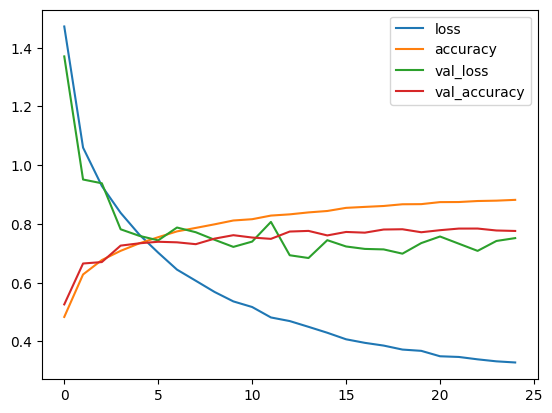

In [16]:
pd.DataFrame(history.history).plot()
plt.show()